In [28]:
from fuzzy_system import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create Some Fuzzy Variables

In [29]:
age_crisp_set = CrispSet({("age", make_continuousSet((0, 80)))})
age = LinguisticVariable(age_crisp_set)

age.add_linguistic_term(Trapezoid("young", 0, 0, 20, 40))
age.add_linguistic_term(Gaussian("middle", 40, 10))
age.add_linguistic_term(Trapezoid("old", 50, 60, 80, 80))

In [30]:
height_crisp_set = CrispSet({("height", make_continuousSet((0, 240)))})
height = LinguisticVariable(height_crisp_set)

height.add_linguistic_term(Trapezoid("short", 0, 0, 150, 160))
height.add_linguistic_term(Trapezoid("medium", 150, 170, 180, 200))
height.add_linguistic_term(Trapezoid("tall", 190, 220, 240, 240))

In [31]:
fitness_crisp_set = CrispSet({("fitness", make_continuousSet((0, 1)))})
fitness = LinguisticVariable(fitness_crisp_set)

fitness.add_linguistic_term(Gaussian("low",0, 0.2))
fitness.add_linguistic_term(Gaussian("medium", 0.5, 0.2))
fitness.add_linguistic_term(Gaussian("high",1, 0.2))

# fitness.add_linguistic_term(Singleton("low", 0))
# fitness.add_linguistic_term(Singleton("medium", 0.5))
# fitness.add_linguistic_term(Singleton("high", 1))

# Plot Variables

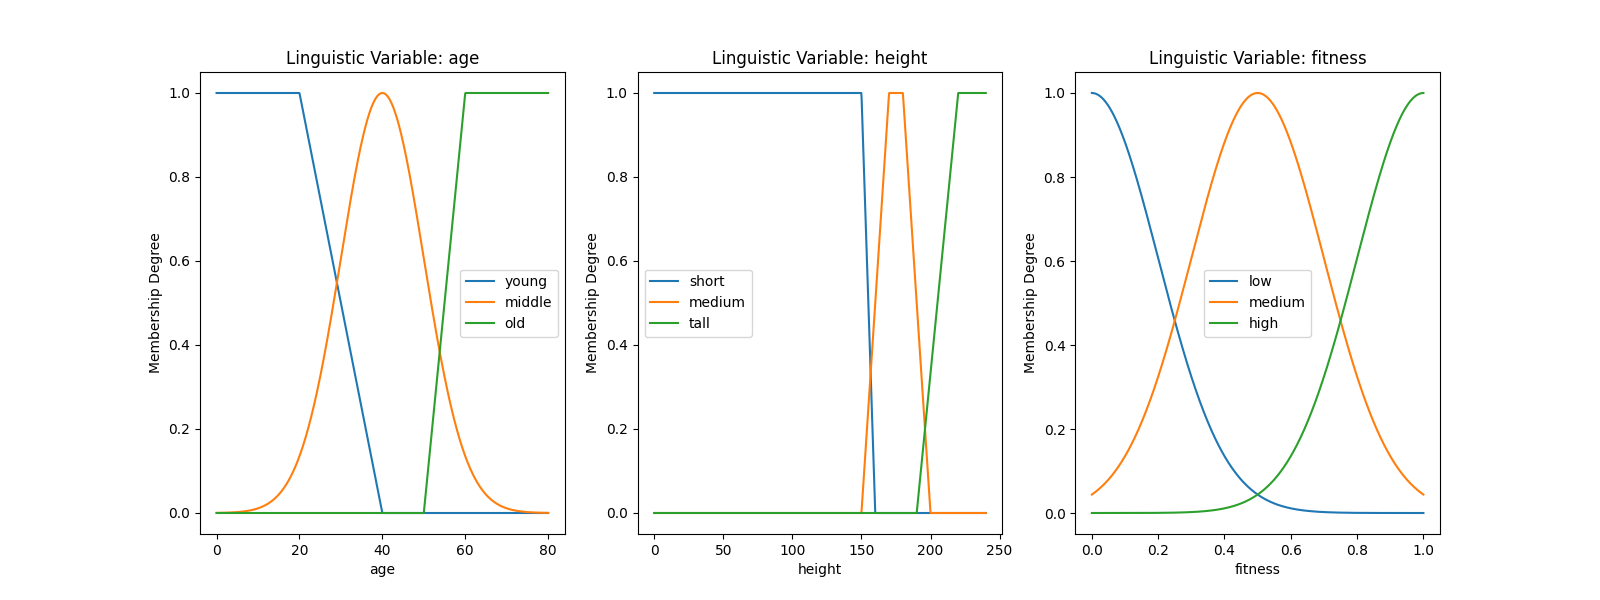

In [32]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16, 6)

age.plot(ax[0])
height.plot(ax[1])
fitness.plot(ax[2])

plt.show()

# Plot Rule Input

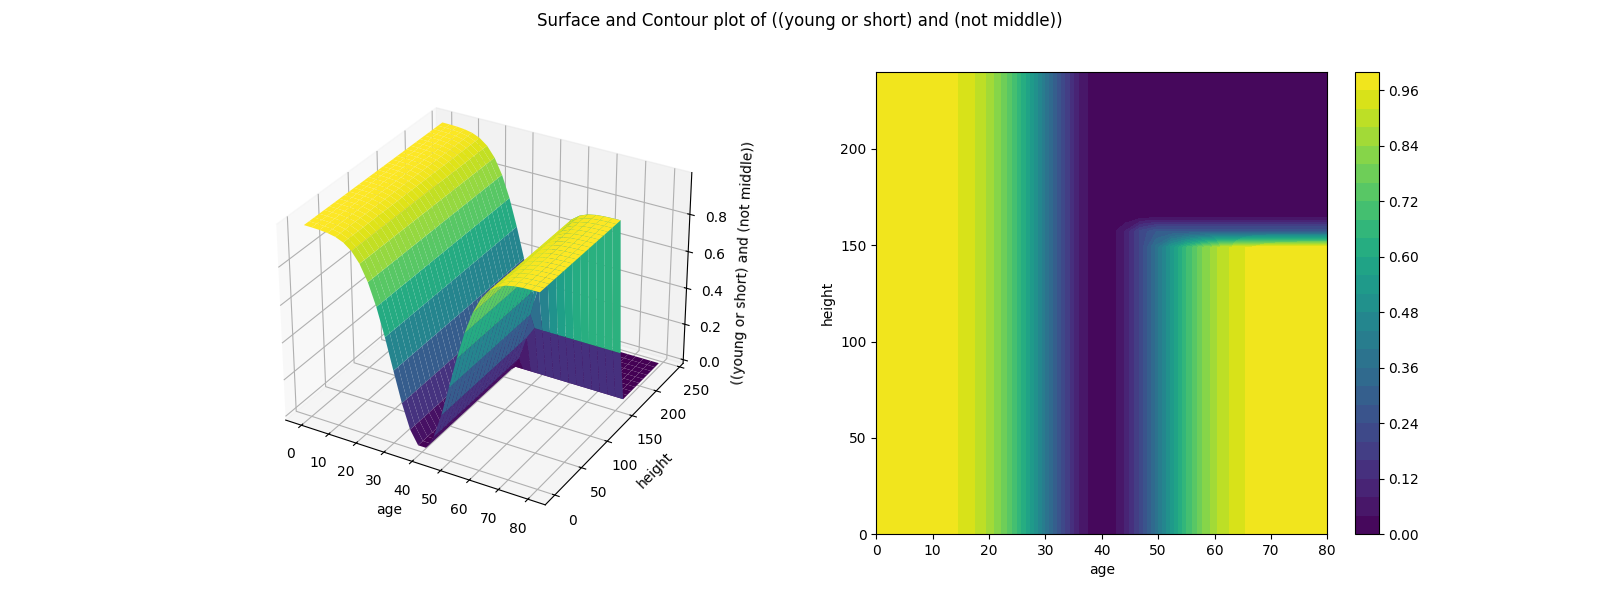

In [33]:
rule1= FuzzyRule(((age=="young") | (height=="short")) & (~(age=="middle")), fitness=="low")

rule1.plot({"x": "age", "y": "height"});

In [34]:
output1=rule1.apply({"age": 30, "height": 75})

output1

FuzzySet({('fitness', Set(SetType.CONTINUOUS, (0, 1)))} -> low↑0.39)

# Plot Cut Result Variable

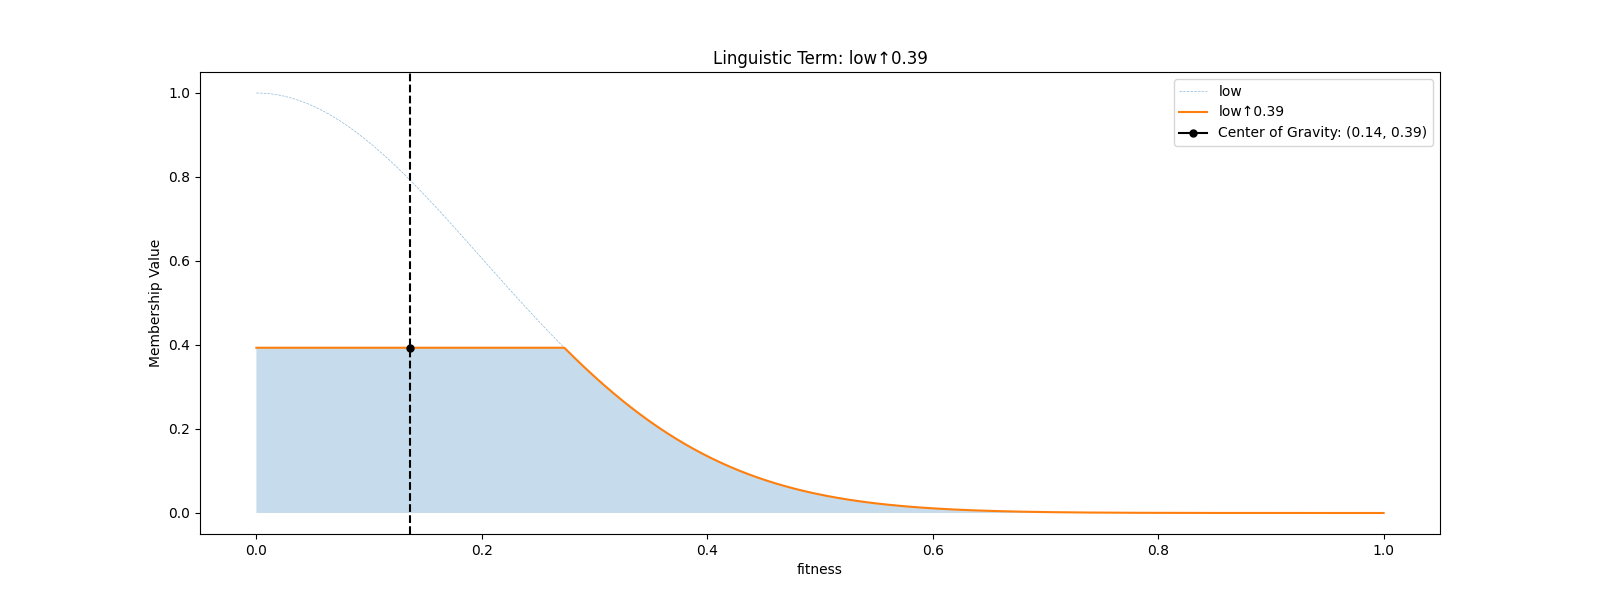

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

output1.plot(ax)

ax.legend()

# Resulting System

In [36]:
fs = FuzzySystem()

fs.add_rule(FuzzyRule((age=="young"), fitness=="high"))
fs.add_rule(FuzzyRule((age=="old") & (height=="short"), fitness=="low"))
fs.add_rule(FuzzyRule((age=="middle") & (height=="medium"), fitness=="medium"))
fs.add_rule(FuzzyRule((age=="middle") & (height=="tall"), fitness=="high"))
fs.add_rule(FuzzyRule((age=="old") & (height=="tall"), fitness=="low"))

# Plot Fitnes at a specific point

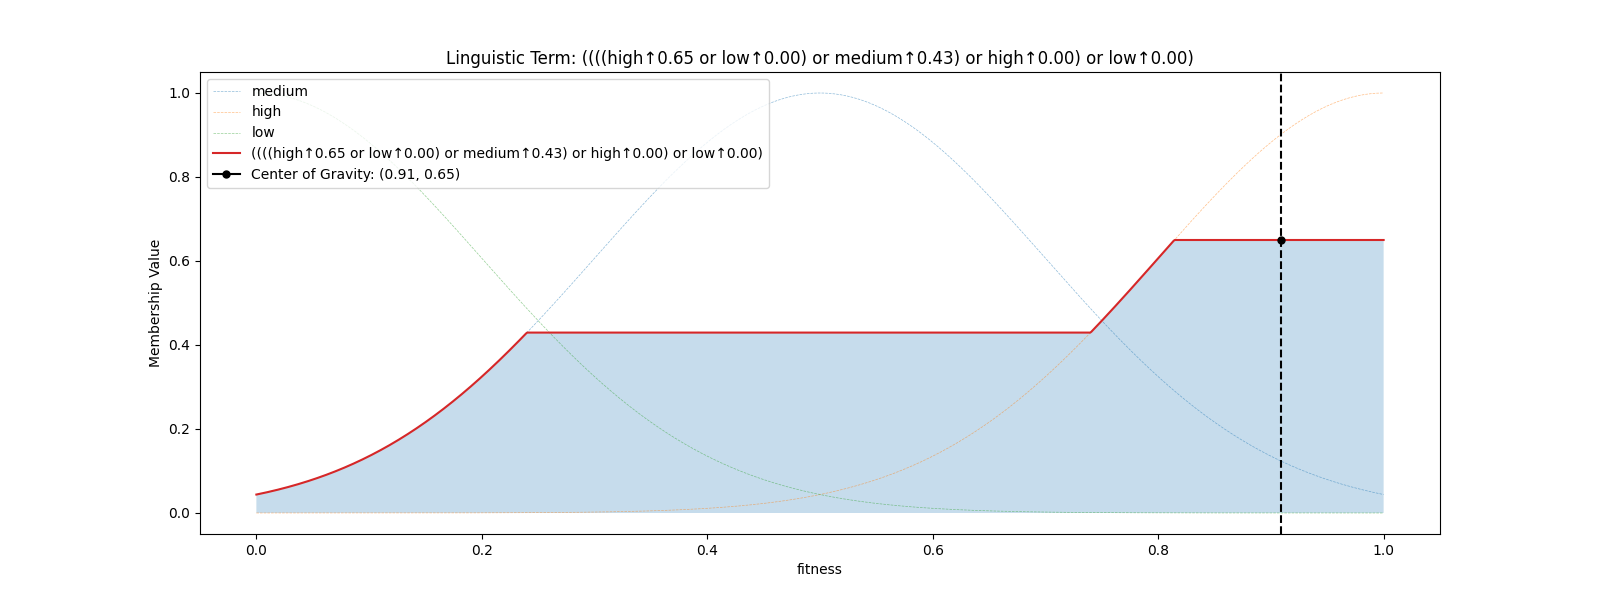

In [37]:
output_membership= fs.applyRules({"age": 27, "height": 170})

fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

output_membership.plot(ax)

ax.legend()

# Plot Decision Surface

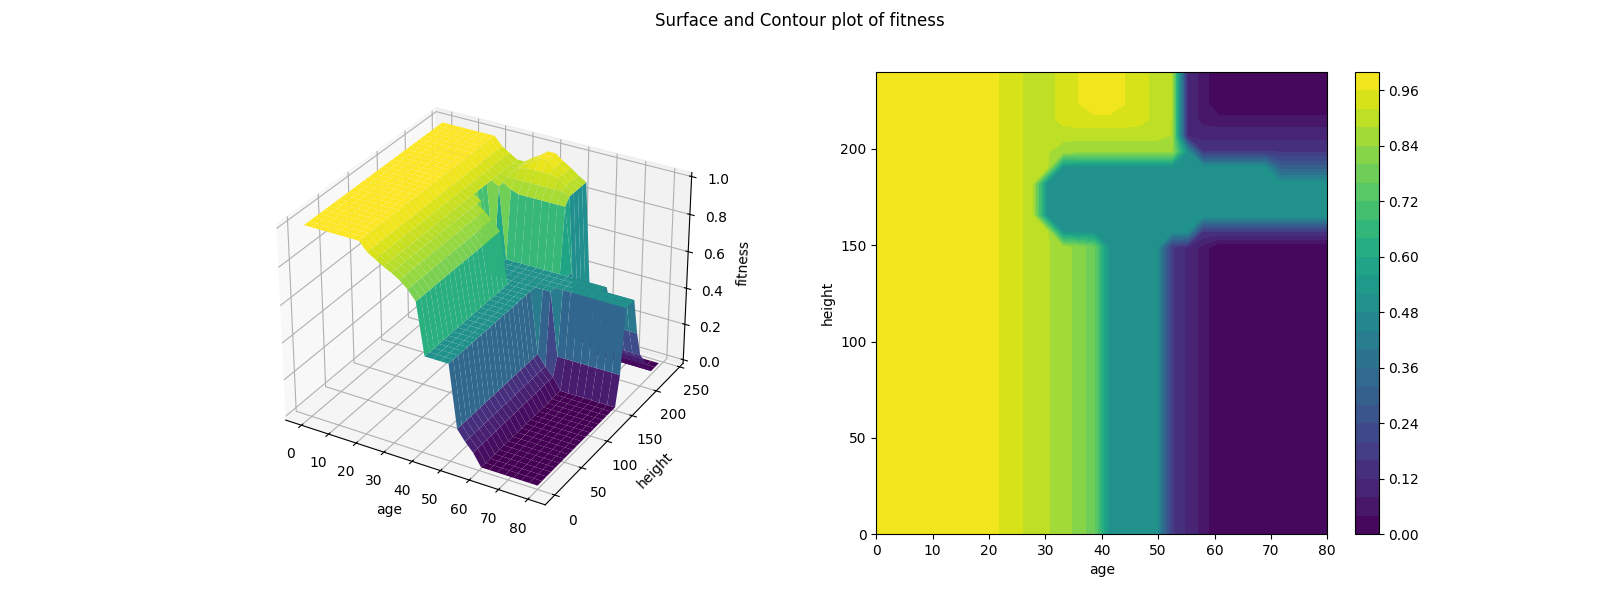

In [38]:
plot3D_surface(fs.getInputCrispSets(), lambda data: fs.predict(data) , {"x": "age", "y": "height", "z":"fitness"}, mesh=30, contour_levels=30);

---
---
---

# Example from Matlab

https://de.mathworks.com/help/fuzzy/building-systems-with-fuzzy-logic-toolbox-software.html 

In [39]:
service_crisp_set = CrispSet({("service", make_continuousSet((0, 10)))})
service = LinguisticVariable(service_crisp_set)

food_crisp_set = CrispSet({("food", make_continuousSet((0, 10)))})
food = LinguisticVariable(food_crisp_set)

tip_crisp_set = CrispSet({("tip", make_continuousSet((0, 25)))})
tip = LinguisticVariable(tip_crisp_set)

In [40]:
service.add_linguistic_term(Gaussian("poor", 0, 1.5))
service.add_linguistic_term(Gaussian("good", 5, 1.5))
service.add_linguistic_term(Gaussian("excellent", 10, 1.5))

food.add_linguistic_term(Trapezoid("rancid", 0, 0, 1, 3))
food.add_linguistic_term(Trapezoid("delicious", 7, 9, 10, 10))

tip.add_linguistic_term(Triangle("cheap", 5, 5))
tip.add_linguistic_term(Triangle("average", 15, 5))
tip.add_linguistic_term(Triangle("generous", 25, 5))

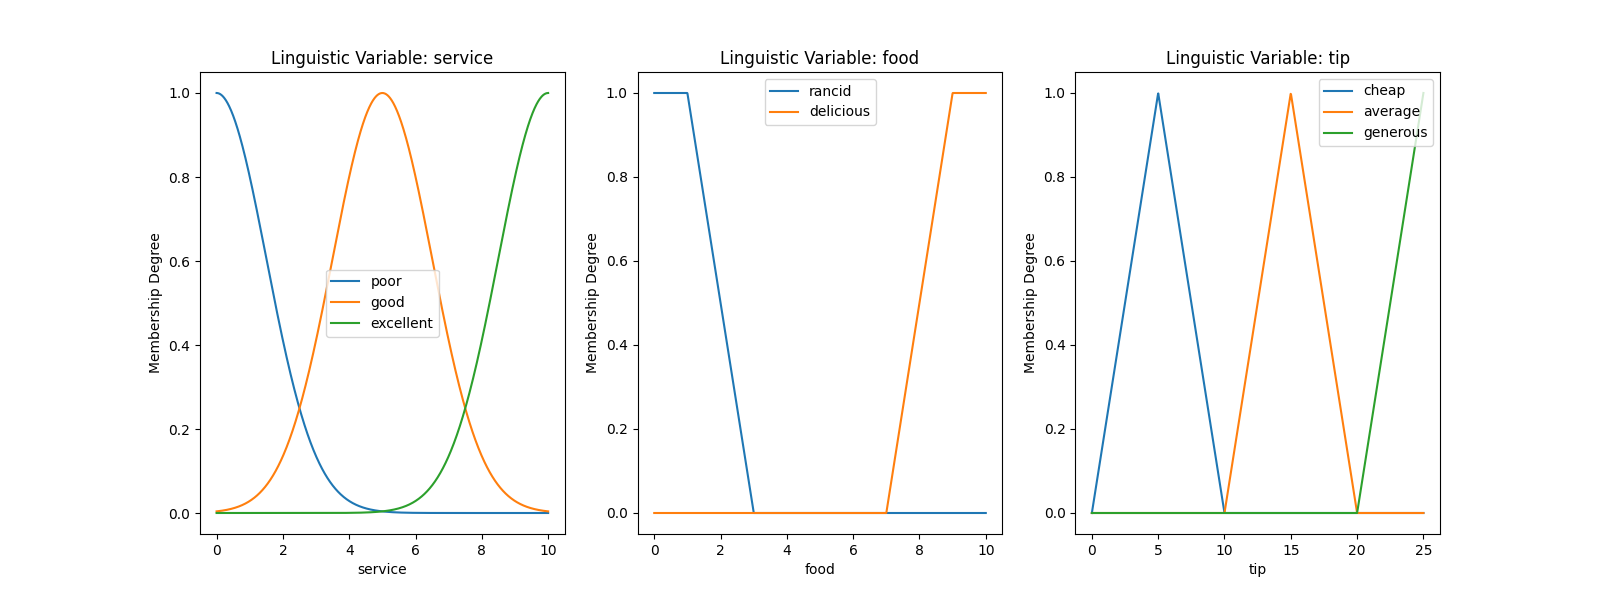

In [41]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16, 6)

service.plot(ax[0])
food.plot(ax[1])
tip.plot(ax[2])

plt.show()

In [42]:
fs = FuzzySystem()

fs.add_rule(FuzzyRule((service=="poor") | (food=="rancid"), tip=="cheap"))
fs.add_rule(FuzzyRule(service=="good", tip=="average"))
fs.add_rule(FuzzyRule((service=="excellent") | (food=="delicious"), tip=="generous"))

fs

FuzzySystem with rules:

FuzzyRule(IF FuzzySet({('food', Set(SetType.CONTINUOUS, (0, 10))), ('service', Set(SetType.CONTINUOUS, (0, 10)))} -> (poor or rancid)) THEN cheap: Triangle(5.00000000, 5.00000000))
FuzzyRule(IF good: Gaussian(5.00000000, 1.50000000) THEN average: Triangle(15.00000000, 5.00000000))
FuzzyRule(IF FuzzySet({('food', Set(SetType.CONTINUOUS, (0, 10))), ('service', Set(SetType.CONTINUOUS, (0, 10)))} -> (excellent or delicious)) THEN generous: Triangle(25.00000000, 5.00000000))

/home/manuel/AutoPas-FuzzyTuning-Bachelor-Thesis/notes/1-Testing/fuzzy-test/python/fuzzy_system.py:394: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


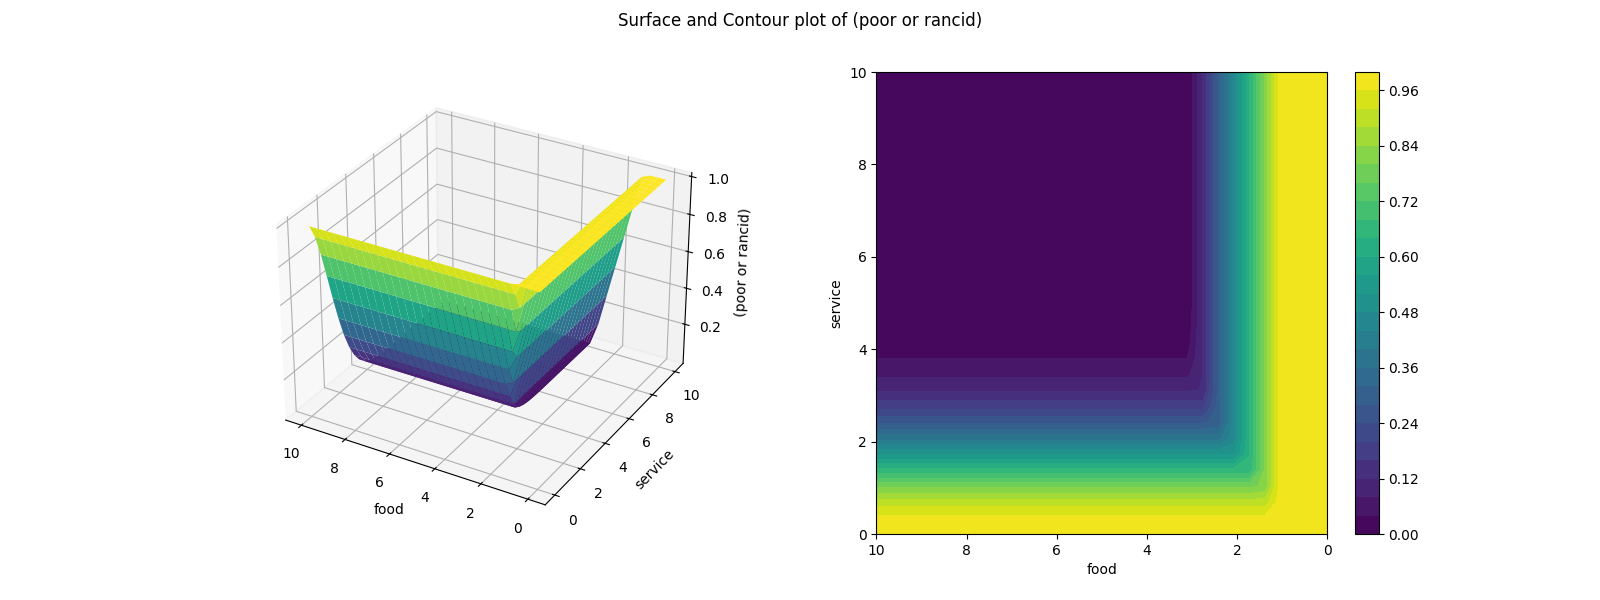

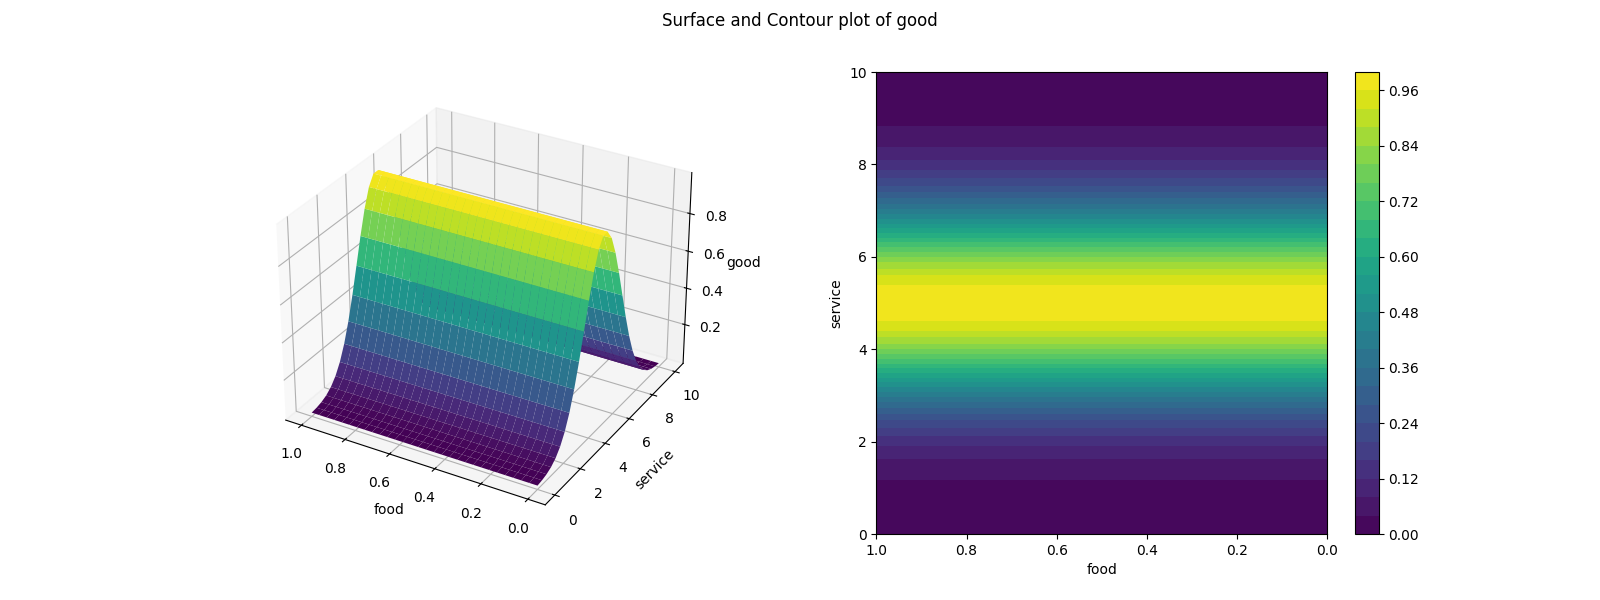

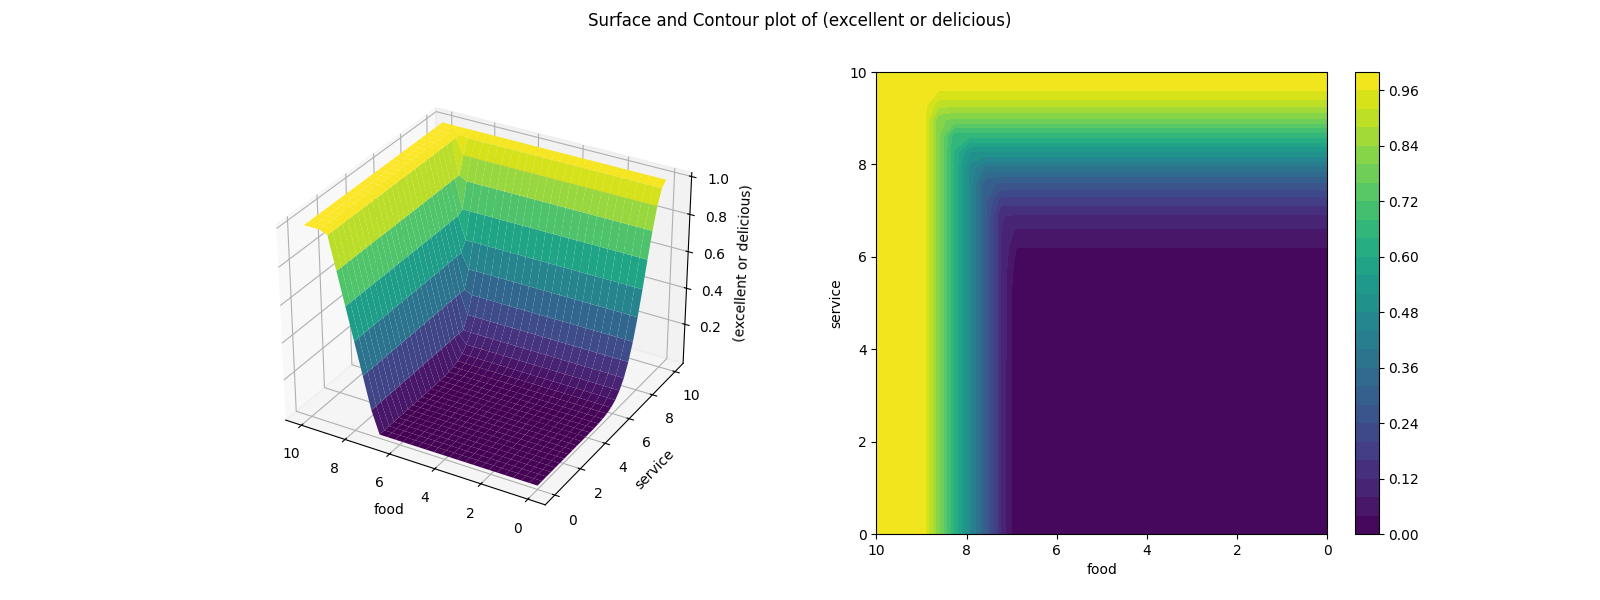

In [43]:
for rule in fs.rules:
    fig=rule.plot({"x": "food", "y": "service"})
    (xl,xh)=fig.get_axes()[1].get_xlim()
    fig.get_axes()[1].set_xlim((xh,xl))
    (xl,xh)=fig.get_axes()[0].get_xlim()
    fig.get_axes()[0].set_xlim((xh,xl))

# Predict Single Values

In [44]:
data={"service": 7, "food": 8}
prediction_of_tip= fs.predict(data)

print(f"Prediction of tip: {prediction_of_tip:.2f} at {data}")

Prediction of tip: 23.86 at {'service': 7, 'food': 8}


# Create Decision Surface

(10.0, 0.0)

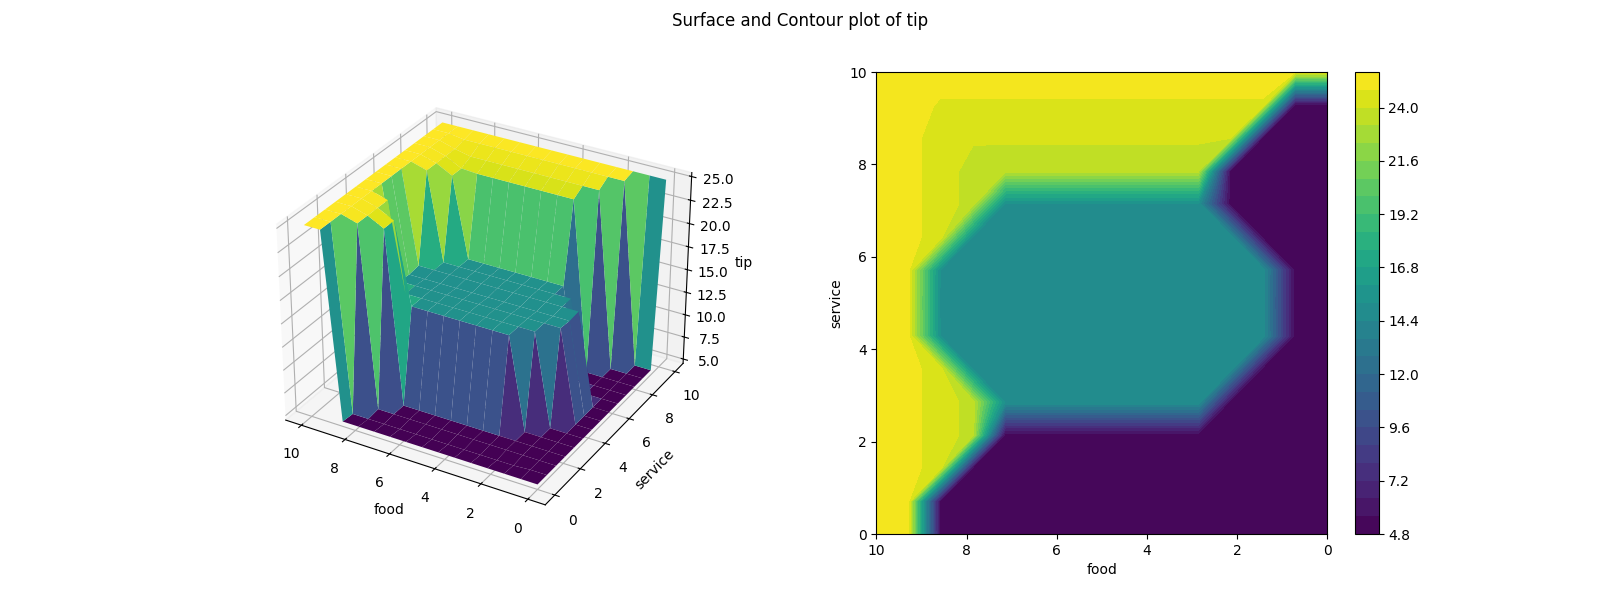

In [45]:
fig=plot3D_surface(fs.getInputCrispSets(), lambda data: fs.predict(data) , {"x": "food", "y": "service","z":"tip"}, mesh=15)

# invert x axis to fit matlab image
(xl,xh)=fig.get_axes()[1].get_xlim()
fig.get_axes()[1].set_xlim((xh,xl))
(xl,xh)=fig.get_axes()[0].get_xlim()
fig.get_axes()[0].set_xlim((xh,xl))

# Predict Single Value

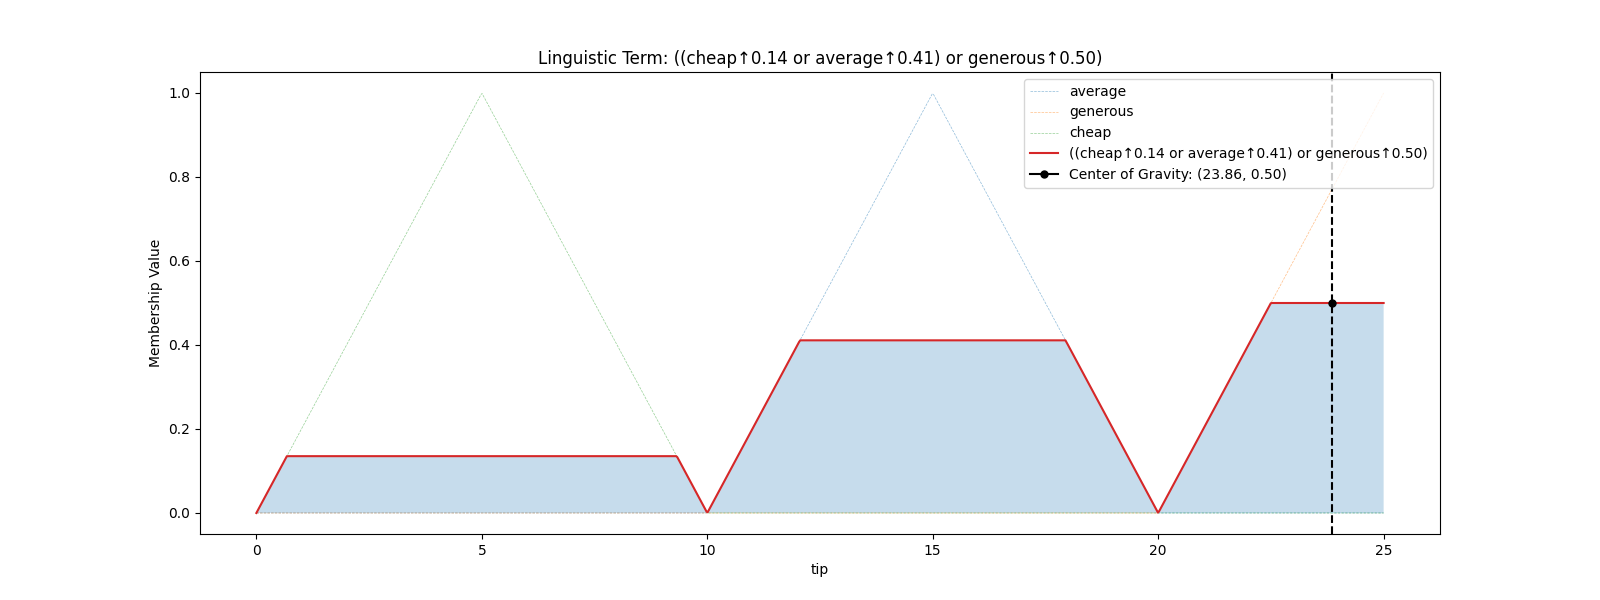

In [46]:
output_membership = fs.applyRules({"food": 8, "service": 3})

fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

output_membership.plot(ax)

ax.legend()